## **Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Importing Modules and Libraries**

In [2]:
import pandas as pd
import os
import numpy
from sklearn.utils import shuffle
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import  RandomOverSampler
import tensorflow as tf
from keras import applications
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow import keras
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### **Uploading Dataset**


---
Current using concat.csv commbined dataset


In [3]:
path='/content/gdrive/MyDrive/Semester Long Assignment 2/dataset/concat.csv'
data=pd.read_csv(path)
data = data.dropna()
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
data = data.sample(frac = 1)

(13907, 22)
(13907, 22)


### **Preprocessing Part**

**Applying Z score Normalization**

In [4]:
def z_score(df):
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

Change the label according to the CSV header of last coloum in the dataset file if not using length function

---


KC2 has   ' problems ' label name , KC1 has ' defects ' , KC3 has ' Defective' , CM1 has ' defects' , JM1 has ' defects ' , MC1 has ' Defective'


---
for every file label should be changed


In [5]:
label=data[data.columns[len(data.columns)-1]]
data.drop(data.columns[len(data.columns)-1], axis = 1, inplace = True) 
print(data)
data=z_score(data)
print(data)
my_data=data.to_numpy()
print(label)

         1.1   1.4  1.4.1  1.4.2    1.3  ...   1.2  1.2.1  1.2.2  1.2.3  1.4.3
6678    14.0   2.0    1.0    2.0   32.0  ...   8.0    9.0   18.0   14.0    3.0
4810    25.0   4.0    1.0    1.0    0.0  ...   0.0    0.0    0.0    0.0    7.0
7184    14.0   3.0    1.0    2.0   50.0  ...  11.0    8.0   28.0   22.0    5.0
13903    4.0   1.0    1.0    1.0    4.0  ...   3.0    1.0    3.0    1.0    1.0
687    145.0  10.0    4.0    6.0  382.0  ...  26.0   45.0  239.0  143.0   19.0
...      ...   ...    ...    ...    ...  ...   ...    ...    ...    ...    ...
5984     4.0   1.0    1.0    1.0    0.0  ...   0.0    0.0    0.0    0.0    1.0
6496    13.0   2.0    1.0    2.0   27.0  ...   7.0   10.0   17.0   10.0    3.0
13409    6.0   1.0    1.0    1.0   16.0  ...   5.0    7.0    8.0    8.0    1.0
9459     4.0   1.0    1.0    1.0    0.0  ...   0.0    0.0    0.0    0.0    1.0
14      24.0   5.0    1.0    2.0  120.0  ...  19.0   25.0   80.0   40.0    9.0

[13907 rows x 21 columns]
            1.1       1.4

In [6]:
print(label[0])

1


In [7]:
#avoid this block  if use JM1.csv 
#error arrises  due to missing values in JM1.csv
for i in range(data.shape[0]):
  #print(label[i])
  if label[i] == 'N' or label[i] == 'False' or label[i] == 'F' or label[i]== 'false' or label[i]=='false ' or label[i]=='no' or label[i]==' no' or label[i] == 0:
    label[i] = 0
    #print("]]")
  else:
    #print("/")
    label[i] = 1

In [8]:
print(label[0])
label = label.to_numpy().astype(int)

1


**Applying SMOTE to remove Class Imbalance**

In [9]:
smote=SMOTE()
my_data, label = smote.fit_resample(my_data, label)
my_data,label=shuffle(my_data, label, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
s_train=int(0.8*my_data.shape[0])
s_test=my_data.shape[0]-s_train
x_train=my_data[0:s_train]
y_train=label[0:s_train]
x_test=my_data[s_train:-1]
y_test=label[s_train:-1]
print(y_train.shape,x_train.shape,x_test.shape,y_test.shape)

(18212,) (18212, 21) (4553, 21) (4553,)


In [11]:
#Debug Code
print(y_test.shape)
print(y_train.shape)
print(x_test.shape)
print(x_train.shape)

(4553,)
(18212,)
(4553, 21)
(18212, 21)


### **ResNet50 Model**

In [12]:
base_model = ResNet50(include_top=False,weights=None,input_shape=(64,64,3),classes=2)

In [13]:
model_1 = Sequential()
model_1.add(tf.keras.Input(x_train.shape[1],))
model_1.add(Dense(12288,activation=('relu')))
model_1.add(tf.keras.layers.Reshape((64,64,3),input_shape=(12288,)))
model_1.add(base_model) 
model_1.add(Flatten())
model_1.add(Dense(1024,activation=('relu'),input_dim=8192))
model_1.add(Dense(128,activation=('relu'),kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model_1.add(Dense(1,activation=('sigmoid')))
model_1.output_shape

(None, 1)

**Model Architecture**

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12288)             270336    
_________________________________________________________________
reshape (Reshape)            (None, 64, 64, 3)         0         
_________________________________________________________________
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [15]:
model_1.compile(optimizer=tf.optimizers.SGD(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])

### **Training Model**

In [17]:
history = model_1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=256)

Epoch 1/50
72/72 [==============================] - 47s 594ms/step - loss: 2.8811 - accuracy: 0.6583 - precision: 0.6735 - recall: 0.6136 - auc: 0.7173 - val_loss: 2.8831 - val_accuracy: 0.6620 - val_precision: 0.6790 - val_recall: 0.6174 - val_auc: 0.7254
Epoch 2/50
72/72 [==============================] - 40s 560ms/step - loss: 2.8663 - accuracy: 0.6693 - precision: 0.6807 - recall: 0.6368 - auc: 0.7340 - val_loss: 2.8864 - val_accuracy: 0.6591 - val_precision: 0.6777 - val_recall: 0.6100 - val_auc: 0.7216
Epoch 3/50
72/72 [==============================] - 41s 563ms/step - loss: 2.8608 - accuracy: 0.6745 - precision: 0.6836 - recall: 0.6490 - auc: 0.7359 - val_loss: 2.8737 - val_accuracy: 0.6633 - val_precision: 0.6746 - val_recall: 0.6341 - val_auc: 0.7307
Epoch 4/50
72/72 [==============================] - 40s 562ms/step - loss: 2.8542 - accuracy: 0.6716 - precision: 0.6782 - recall: 0.6522 - auc: 0.7406 - val_loss: 2.8680 - val_accuracy: 0.6785 - val_precision: 0.6887 - val_recal

### **Results**

**Loss , Accuracy , Precision , AUC , F1 Score ,  Recall**

In [18]:
result = model_1.evaluate(x_test,y_test)
dict(zip(model_1.metrics_names, result))

143/143 [==============================] - 7s 45ms/step - loss: 2.7704 - accuracy: 0.7329 - precision: 0.7325 - recall: 0.7358 - auc: 0.8038


{'accuracy': 0.7329233288764954,
 'auc': 0.8037700057029724,
 'loss': 2.770364999771118,
 'precision': 0.7325479984283447,
 'recall': 0.7357581257820129}

In [19]:
predi = model_1.predict(x_test) 
xxx =numpy.round_(predi)


In [20]:
print("f score")
kk = 2 * result[3]*result[2]
ff = result[3]+result[2]
print(kk/ff)

f score
0.7341495529876124


In [21]:
print(result)
print(result[3])
print(result[2])

[2.770364999771118, 0.7329233288764954, 0.7325479984283447, 0.7357581257820129, 0.8037700057029724]
0.7357581257820129
0.7325479984283447


manual recheck

In [22]:
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(y_test.shape[0]):
  if xxx[i] == 1 and y_test[i] == 1:
    tp +=1
  elif xxx[i] == 0 and y_test[i] == 0:
    tn +=1
  elif xxx[i] == 0 and y_test[i] == 1:
    fn +=1
  else:
    fp +=1
print("recall")
recc = tp/(tp+fn)
print(recc)
print("precision")
pree = tp/(tp+fp)
print(pree)
print("f1 score")
f_one = (2*pree*recc)/(pree+recc)
print(f_one)

recall
0.7357581069237511
precision
0.7325479930191972
f1 score
0.7341495408832531


In [23]:
print(tn)
print(tp)
print(fn)
print(fp)


1658
1679
603
613


### **ROC Curve** 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


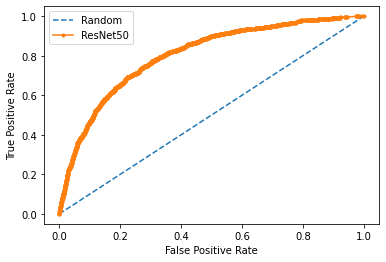

In [24]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model_1.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 0]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
#print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ResNet50')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


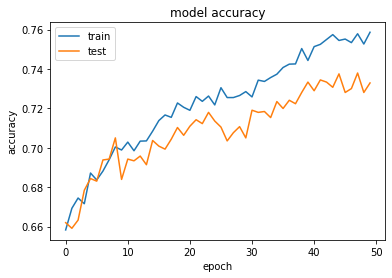

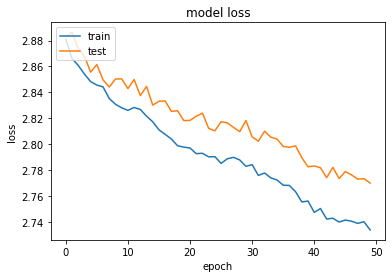

In [26]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()